# MLCC - Laboratory 3 - Dimensionality reduction and feature selection
    In this laboratory we will address the problem of data analysis with a reference to a classification problem. 
    Follow the instructions below.

In [23]:
# Import the 
from lab3ImpFunction import *
import matplotlib.pyplot as plt

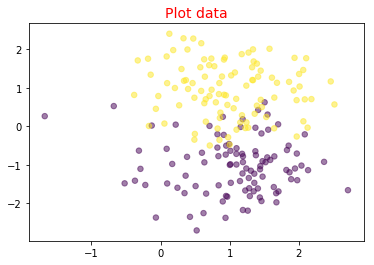

In [25]:
# main1
n = 100
dim = 30

Xtr, Ytr = MixGauss(means=[[1,-1],[1,1]],sigmas=[[0.7], [0.7]],n=n)
Ytr = 2*np.mod(Ytr, 2)-1

Xts, Yts = MixGauss(means=[[1,-1],[1,1]],sigmas=[[0.7], [0.7]],n=n)
Yts = 2*np.mod(Yts, 2)-1

plt.scatter(Xtr[:,0], Xtr[:,1], s=30, c=np.squeeze(Ytr), alpha=0.5)
plt.title('Plot data', fontsize=14, color='red')
plt.show()

In [ ]:
sigma_noise = 0.01

Xtr_noise = sigma_noise * np.random.randn(2*n, dim-2)
Xts_noise = sigma_noise * np.random.randn(2*n, dim-2)

Xtr = np.concatenate((Xtr, Xtr_noise), axis=1)
Xts = np.concatenate((Xts, Xts_noise), axis=1)

V, d, X_proj = PCA(Xtr, 3)
print(X_proj.shape)

plt.scatter(X_proj[:,0], X_proj[:,1], s=30, c=np.squeeze(Ytr), alpha=0.5)

#print(np.mean(X_proj, axis=0))
plt.title('Second plot', fontsize=14, color='red')
plt.show()

In [ ]:
#PCA
#mean= Xtr.mean(axis=0)
#Xtr = Xtr - mean
#cov_mat = Xtr.T @ Xtr   
#X_proj, d, V = np.linalg.svd(cov_mat)

fig = pyplot.figure()
ax = Axes3D(fig)

x = X_proj[:,0].real
y = X_proj[:,1].real
z = X_proj[:,2].real

ax.scatter(x, y, z, c=np.squeeze(Ytr), marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
#V, d, X_proj = PCA(Xtr, 3);
print(np.sqrt(d[:10]))

#plt.scatter(list(range(D)), abs(X_proj[:,0]))
plt.scatter(range(dim), abs(d))

plt.show()

In [ ]:
## Test on different sigma
n = 100
dim = 30

Xtr, Ytr = MixGauss(means=[[1,-1],[1,1]],sigmas=[[0.7], [0.7]],n=n)
Ytr = 2*np.mod(Ytr, 2)-1

Xts, Yts = MixGauss(means=[[1,-1],[1,1]],sigmas=[[0.7], [0.7]],n=n)
Yts = 2*np.mod(Yts, 2)-1



In [26]:
sigma_noise = 0.01;
Xtr_noise = sigma_noise * np.random.randn(2*n, dim-2);
Xts_noise = sigma_noise * np.random.randn(2*n, dim-2);

Xtr = np.concatenate((Xtr, Xtr_noise), axis=1)
Xts = np.concatenate((Xts, Xts_noise), axis=1)
# Normalize
m = np.mean(Xtr, axis=0)
s = np.std(Xtr, axis=0)

Xtr = (Xtr - m) / s
Xts = (Xts - m) / s

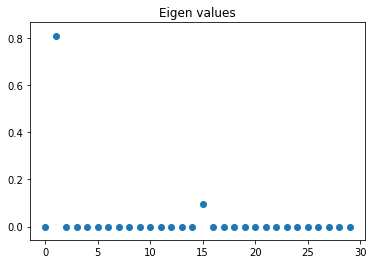

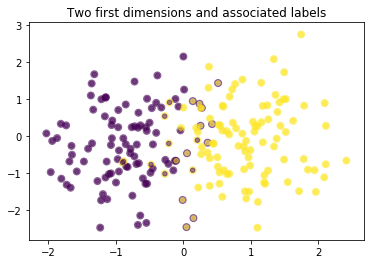

In [30]:
    
w, r, I = OMatchingPursuit(Xtr, Ytr, 2)
Ypred = np.sign(Xts.dot(w))

err = calcErr(Yts, Ypred);
plt.scatter(list(range(dim)), abs(w))
plt.title('Eigen values');
plt.show()

plt.scatter(Xts[:,1], Xts[:,2], 50, Yts, alpha=0.5)
plt.scatter(Xts[:,1], Xts[:,2], 20, Ypred, alpha=0.5)
plt.title('Two first dimensions and associated labels')
plt.show()    

In [ ]:
intIter = list(range(dim))
perc = 0.75
nrip = 20
it, Vm, Vs, Tm, Ts = holdoutCVOMP(Xtr, Ytr, perc, nrip, intIter)


plt.plot(intIter, Tm, 'r+');

plt.plot(intIter, Vm, 'b+');

plt.title('Cross validation results', fontsize=20, color='red'); 

plt.xlabel('Number of dimension', fontsize=12, color='red'); 
plt.ylabel('error', fontsize=12, color='red');

plt.show()

In [ ]:
a.shape